<a href="https://colab.research.google.com/github/ashi-agrawal-06/crop-production-prediction-using-machine-learning/blob/main/crop_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('crop_production.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


<Figure size 1440x576 with 0 Axes>

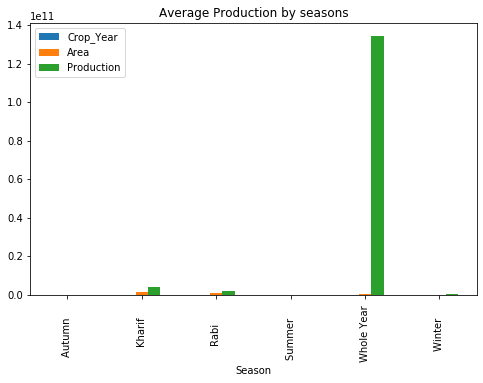

In [ ]:
plt.figure(figsize=(20,8))
df.groupby('Season').aggregate(sum).plot(figsize=(8,5),title='Average Production by seasons',kind='bar')

Since Crops during whole year are extremely dominant. Hnce prediction during seasons will be affected

In [ ]:
df = df[df['Season'] != 'Whole Year '] 

In [ ]:
df.head()

State_Name District_Name  ...    Area Production
0   Andaman and Nicobar Islands      NICOBARS  ...  1254.0     2000.0
1   Andaman and Nicobar Islands      NICOBARS  ...     2.0        1.0
2   Andaman and Nicobar Islands      NICOBARS  ...   102.0      321.0
10  Andaman and Nicobar Islands      NICOBARS  ...  1254.0     2061.0
11  Andaman and Nicobar Islands      NICOBARS  ...     2.0        1.0

[5 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188786 entries, 0 to 246090
Data columns (total 7 columns):
State_Name       188786 non-null object
District_Name    188786 non-null object
Crop_Year        188786 non-null int64
Season           188786 non-null object
Crop             188786 non-null object
Area             188786 non-null float64
Production       186234 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.5+ MB


In [ ]:
df.drop(df[df.Season=='Whole Year'].index, inplace=True)

In [ ]:
df.head()

State_Name District_Name  ...    Area Production
0   Andaman and Nicobar Islands      NICOBARS  ...  1254.0     2000.0
1   Andaman and Nicobar Islands      NICOBARS  ...     2.0        1.0
2   Andaman and Nicobar Islands      NICOBARS  ...   102.0      321.0
10  Andaman and Nicobar Islands      NICOBARS  ...  1254.0     2061.0
11  Andaman and Nicobar Islands      NICOBARS  ...     2.0        1.0

[5 rows x 7 columns]

In [ ]:
df.shape

(188786, 7)

In [ ]:
missing_data=df.isnull()
missing_data.head()

State_Name  District_Name  Crop_Year  Season   Crop   Area  Production
0        False          False      False   False  False  False       False
1        False          False      False   False  False  False       False
2        False          False      False   False  False  False       False
10       False          False      False   False  False  False       False
11       False          False      False   False  False  False       False

In [ ]:
missing_data['Production'].value_counts()

False    186234
True       2552
Name: Production, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188786 entries, 0 to 246090
Data columns (total 7 columns):
State_Name       188786 non-null object
District_Name    188786 non-null object
Crop_Year        188786 non-null int64
Season           188786 non-null object
Crop             188786 non-null object
Area             188786 non-null float64
Production       186234 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.5+ MB


In [ ]:
df.dropna(subset=['Production'],axis=0,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186234 entries, 0 to 186233
Data columns (total 7 columns):
State_Name       186234 non-null object
District_Name    186234 non-null object
Crop_Year        186234 non-null int64
Season           186234 non-null object
Crop             186234 non-null object
Area             186234 non-null float64
Production       186234 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 9.9+ MB


In [ ]:
dfcorr=df.corr()

In [ ]:
dfcorr.style.background_gradient()

In [ ]:
dfcorr['Production']

Crop_Year     0.020880
Area          0.326617
Production    1.000000
Name: Production, dtype: float64

In [ ]:
df["State_Name"].value_counts()[:5]

Uttar Pradesh     30450
Karnataka         16116
Bihar             15345
Madhya Pradesh    14559
Odisha            12215
Name: State_Name, dtype: int64

In [ ]:
df['District_Name'].value_counts()

AURANGABAD    763
BELLARY       719
BELGAUM       709
BIJAPUR       709
TUMKUR        702
             ... 
HYDERABAD       8
LONGDING        6
KHUNTI          6
RAMGARH         6
MUMBAI          1
Name: District_Name, Length: 645, dtype: int64

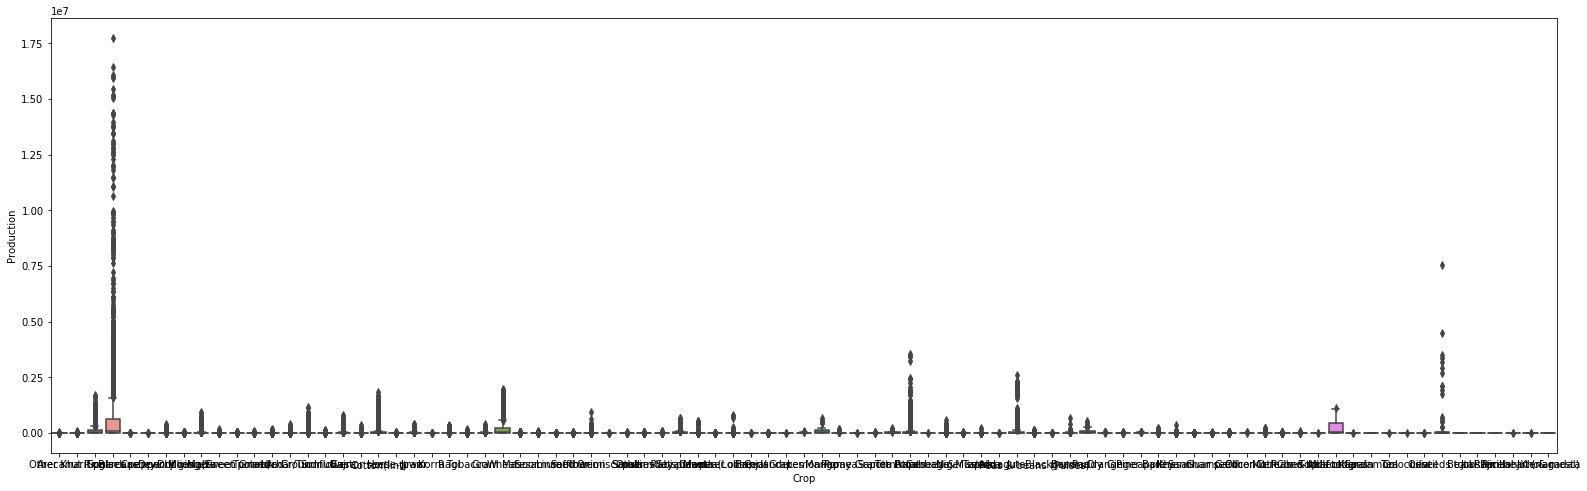

In [ ]:
plt.figure(figsize=(27,8))
sns.boxplot(x='Crop',y='Production',data=df)
plt.show()

In [ ]:
df['Season'].value_counts()

Kharif         94283
Rabi           66160
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

In [ ]:
df['Crop'].value_counts()

Rice                  14954
Maize                 13550
Moong(Green Gram)      9925
Urad                   9539
Groundnut              8496
                      ...  
Ricebean (nagadal)       10
Jobster                   9
Perilla                   9
Tea                       8
Kapas                     8
Name: Crop, Length: 85, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label1=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
label4=LabelEncoder()

In [ ]:

df['State_Name']=label1.fit_transform(df['State_Name'])
df['Season']=label2.fit_transform(df['Season'])
df['Crop']=label3.fit_transform(df['Crop'])
df['District_Name']=label4.fit_transform(df['District_Name'])

In [ ]:
df.head()

State_Name  District_Name  Crop_Year  Season  Crop    Area  Production
0           0            426       2000       1     0  1254.0      2000.0
1           0            426       2000       1    50     2.0         1.0
2           0            426       2000       1    62   102.0       321.0
3           0            426       2001       1     0  1254.0      2061.0
4           0            426       2001       1    50     2.0         1.0

In [ ]:
for i in df.columns:
  df[i]=df[i]/df[i].max()

In [ ]:
dfcorr=df.corr()
dfcorr["Production"]

State_Name       0.055585
District_Name   -0.007261
Crop_Year        0.020880
Season          -0.007597
Crop             0.086190
Area             0.326617
Production       1.000000
Name: Production, dtype: float64

In [ ]:
dfcorr.style.background_gradient()

In [ ]:
from scipy import stats

In [ ]:
pearson_coef,p_value=stats.pearsonr(df['Area'],df['Production'])
print("The Pearson Correlation Coefficient is",pearson_coef)
print("with a P-value of P=",p_value)

The Pearson Correlation Coefficient is 0.3266170838413268
with a P-value of P= 0.0


In [ ]:
pearson_coef,p_value=stats.pearsonr(df['District_Name'],df['Production'])
print("The Pearson Correlation Coefficient is",pearson_coef)
print("with a P-value of P=",p_value)

The Pearson Correlation Coefficient is -0.0072608355589902735
with a P-value of P= 0.0017278080185892891


In [ ]:
pearson_coef,p_value=stats.pearsonr(df['Crop_Year'],df['Production'])
print("The Pearson Correlation Coefficient is",pearson_coef)
print("with a P-value of P=",p_value)

The Pearson Correlation Coefficient is 0.020879538826865027
with a P-value of P= 2.0334451863116733e-19


In [ ]:
pearson_coef,p_value=stats.pearsonr(df['State_Name'],df['Production'])
print("The Pearson Correlation Coefficient is",pearson_coef)
print("with a P-value of P=",p_value)

The Pearson Correlation Coefficient is 0.05558482263517734
with a P-value of P= 2.4107812234571083e-127


In [ ]:
pearson_coef,p_value=stats.pearsonr(df['Season'],df['Production'])
print("The Pearson Correlation Coefficient is",pearson_coef)
print("with a P-value of P=",p_value)

The Pearson Correlation Coefficient is -0.00759748264509171
with a P-value of P= 0.0010428399879471365


In [ ]:
pearson_coef,p_value=stats.pearsonr(df['Crop'],df['Production'])
print("The Pearson Correlation Coefficient is",pearson_coef)
print("with a P-value of P=",p_value)

The Pearson Correlation Coefficient is 0.08618953314348331
with a P-value of P= 6.27313101433789e-304


In [ ]:
X=df.iloc[:,[0,4,5]]

In [ ]:
Y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=6)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg=LinearRegression()

In [ ]:
linreg.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linreg.score(Xtest,Ytest)*100

10.751514446649924

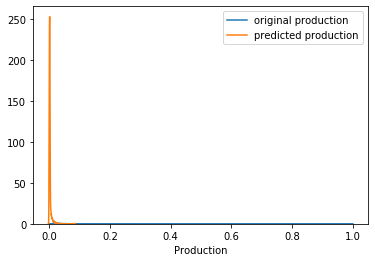

In [ ]:
yhat=linreg.predict(Xtest)
ax=sns.distplot(Ytest,hist=False,label="original production")
sns.distplot(yhat,hist=False,label="predicted production",ax=ax)

In [ ]:
# very poor

**Decision Tree**

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dectree=DecisionTreeRegressor(max_depth=40)

In [ ]:
dectree.fit(Xtrain,Ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=40,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dectree.score(Xtest,Ytest)*100

94.00535219224952

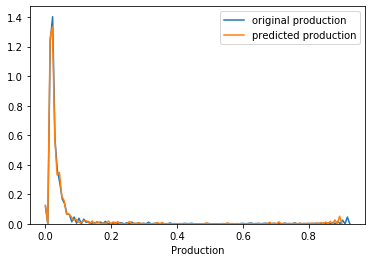

In [ ]:
yhat=dectree.predict(Xtest)
ax=sns.distplot(Ytest,hist=False,label="original production")
sns.distplot(yhat,hist=False,label="predicted production",ax=ax)

In [ ]:
#good

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ranfor=RandomForestRegressor(n_estimators=300)

In [ ]:
ranfor.fit(Xtrain,Ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
ranfor.score(Xtest,Ytest)*100

96.03436337623066

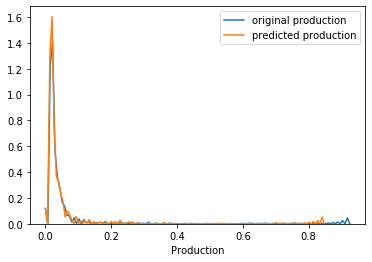

In [ ]:
yhat=ranfor.predict(Xtest)
ax=sns.distplot(Ytest,hist=False,label="original production")
sns.distplot(yhat,hist=False,label="predicted production",ax=ax)

**Polynomial Regression**

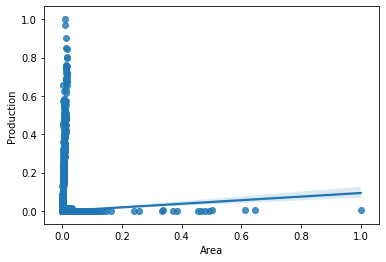

In [ ]:
sns.regplot(x="Area",y="Production",data=df)

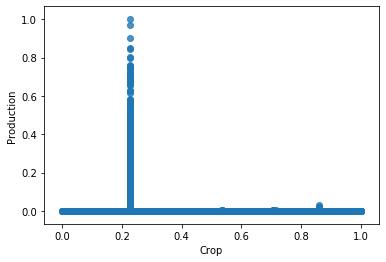

In [ ]:
sns.regplot(x="Crop",y="Production",data=df)

In [ ]:
#dataset not fit for polynomial regression

**Vizualisation**

In [ ]:
# import graph objects as "go"
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
df=pd.read_csv('crop_production.csv')

In [ ]:
df.head()

State_Name District_Name  ...    Area Production
0  Andaman and Nicobar Islands      NICOBARS  ...  1254.0     2000.0
1  Andaman and Nicobar Islands      NICOBARS  ...     2.0        1.0
2  Andaman and Nicobar Islands      NICOBARS  ...   102.0      321.0
3  Andaman and Nicobar Islands      NICOBARS  ...   176.0      641.0
4  Andaman and Nicobar Islands      NICOBARS  ...   720.0      165.0

[5 rows x 7 columns]

In [ ]:
sub=df[['Season','Production']].copy()


In [ ]:
sub=sub.groupby('Season').aggregate(sum)
sub.head()

Production
Season                   
Autumn       6.441377e+07
Kharif       4.029970e+09
Rabi         2.051688e+09
Summer       1.706579e+08
Whole Year   1.344248e+11

In [ ]:

sub=sub.groupby('Season')['Production'].mean()
sub=sub.reset_index()
sub.columns=["Season","Average Production"]
sub.head()

Season  Average Production
0  Autumn             6.441377e+07
1  Kharif             4.029970e+09
2  Rabi               2.051688e+09
3  Summer             1.706579e+08
4  Whole Year         1.344248e+11

<Figure size 1440x576 with 0 Axes>

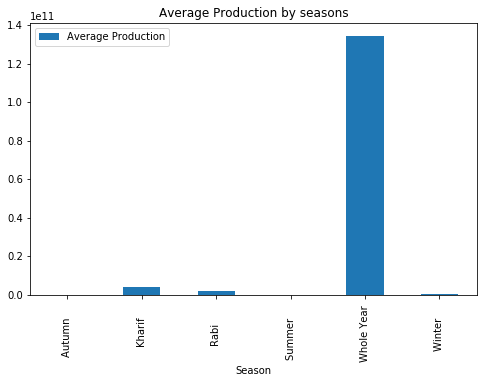

In [ ]:
plt.figure(figsize=(20,8))
sub.groupby('Season').aggregate(sum).plot(figsize=(8,5),title='Average Production by seasons',kind='bar')


*Maxium production occurs throughtout the year followed by very less in kharif, rabi and winter and no production in autumn or summer*

In [ ]:
sub2=df[['Season','Area']].copy()

sub2=sub2.groupby('Season')['Area'].mean()
sub2=sub2.reset_index()
sub2.columns=["Season","Avg Area cultivated in seasons"]
sub2.head()

Season  Avg Area cultivated in seasons
0  Autumn                          9713.301744
1  Kharif                         14641.277598
2  Rabi                           14151.812019
3  Summer                          5119.874580
4  Whole Year                      4490.017723

<Figure size 1440x576 with 0 Axes>

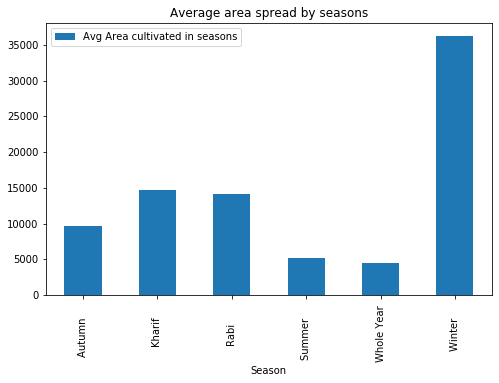

In [ ]:
plt.figure(figsize=(20,8))
sub2.groupby('Season').sum().plot(figsize=(8,5),title='Average area spread by seasons',kind='bar')

In [ ]:
seasons=pd.merge(sub,sub2,on="Season")
seasons["Average Production"]=(seasons["Average Production"]/seasons["Average Production"].sum())*100
seasons["Avg Area cultivated in seasons"]=(seasons["Avg Area cultivated in seasons"]/seasons["Avg Area cultivated in seasons"].sum())*100


In [ ]:
seasons=seasons.sort_values('Avg Area cultivated in seasons',ascending=False)

In [ ]:
trace1 = go.Bar(
                x = seasons.Season,
                y = seasons["Average Production"],
                name = "Production",
                marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = seasons.Season)
# create trace2 
trace2 = go.Bar(
                x = seasons.Season,
                y = seasons["Avg Area cultivated in seasons"],
                name = "Area",
                marker = dict(color = 'rgba(0, 128, 0, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = seasons.Season)
data = [trace1, trace2]
layout = go.Layout(barmode='group',title="Production and Area Vs Seasons")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

A lot of area is goes waste as it is cultivated during winters as there is negligible production in winters

In [ ]:
states=df[['State_Name','Area']].copy()

states=states.groupby('State_Name')['Area'].mean()
states=states.reset_index()
states.columns=["State","Avg Area"]
states=states.sort_values('Avg Area',ascending=False)

In [ ]:
states

State      Avg Area
24                       Punjab  39938.728648
17                  Maharashtra  25515.223076
32                  West Bengal  22407.702889
25                    Rajasthan  21737.646236
9                       Gujarat  18367.001422
10                      Haryana  15250.605277
28                   Telangana   14402.659586
16               Madhya Pradesh  14375.327377
1                Andhra Pradesh  13662.842127
30                Uttar Pradesh  13019.624992
14                    Karnataka   9606.577171
22                       Odisha   8142.439484
6                  Chhattisgarh   7754.194042
15                       Kerala   7488.400218
13                    Jharkhand   7417.888017
27                   Tamil Nadu   7078.900642
4                         Bihar   6792.270638
8                           Goa   5796.540865
12           Jammu and Kashmir    5669.903917
3                         Assam   4811.235849
11             Himachal Pradesh   4011.178027
31                  Uttarakhand   3838.476103
29                      Tripura   3287.258499
26                       Sikkim   2135.124650
2             Arunachal Pradesh   1714.197172
0   Andaman and Nicobar Islands   1664.512660
18                      Manipur   1584.265193
21                     Nagaland   1554.268817
7        Dadra and Nagar Haveli   1507.661597
19                    Meghalaya   1407.404255
20                      Mizoram   1038.385758
23                   Puducherry    626.417808
5                    Chandigarh    139.133333

In [ ]:
total=states["Avg Area"].sum()
total

293743.99634704046

In [ ]:
def per(i):
  y=(i/total)*100
  return y

In [ ]:
states.loc[:,'%_area_occupied']=states['Avg Area'].apply(per)

In [ ]:
states

State      Avg Area  %_area_occupied
24                       Punjab  39938.728648        13.596441
17                  Maharashtra  25515.223076         8.686211
32                  West Bengal  22407.702889         7.628310
25                    Rajasthan  21737.646236         7.400201
9                       Gujarat  18367.001422         6.252724
10                      Haryana  15250.605277         5.191802
28                   Telangana   14402.659586         4.903133
16               Madhya Pradesh  14375.327377         4.893828
1                Andhra Pradesh  13662.842127         4.651275
30                Uttar Pradesh  13019.624992         4.432303
14                    Karnataka   9606.577171         3.270391
22                       Odisha   8142.439484         2.771951
6                  Chhattisgarh   7754.194042         2.639780
15                       Kerala   7488.400218         2.549295
13                    Jharkhand   7417.888017         2.525290
27                   Tamil Nadu   7078.900642         2.409888
4                         Bihar   6792.270638         2.312310
8                           Goa   5796.540865         1.973331
12           Jammu and Kashmir    5669.903917         1.930220
3                         Assam   4811.235849         1.637901
11             Himachal Pradesh   4011.178027         1.365535
31                  Uttarakhand   3838.476103         1.306742
29                      Tripura   3287.258499         1.119090
26                       Sikkim   2135.124650         0.726866
2             Arunachal Pradesh   1714.197172         0.583568
0   Andaman and Nicobar Islands   1664.512660         0.566654
18                      Manipur   1584.265193         0.539335
21                     Nagaland   1554.268817         0.529124
7        Dadra and Nagar Haveli   1507.661597         0.513257
19                    Meghalaya   1407.404255         0.479126
20                      Mizoram   1038.385758         0.353500
23                   Puducherry    626.417808         0.213253
5                    Chandigarh    139.133333         0.047366

Text(0, 0.5, '% area occupied')

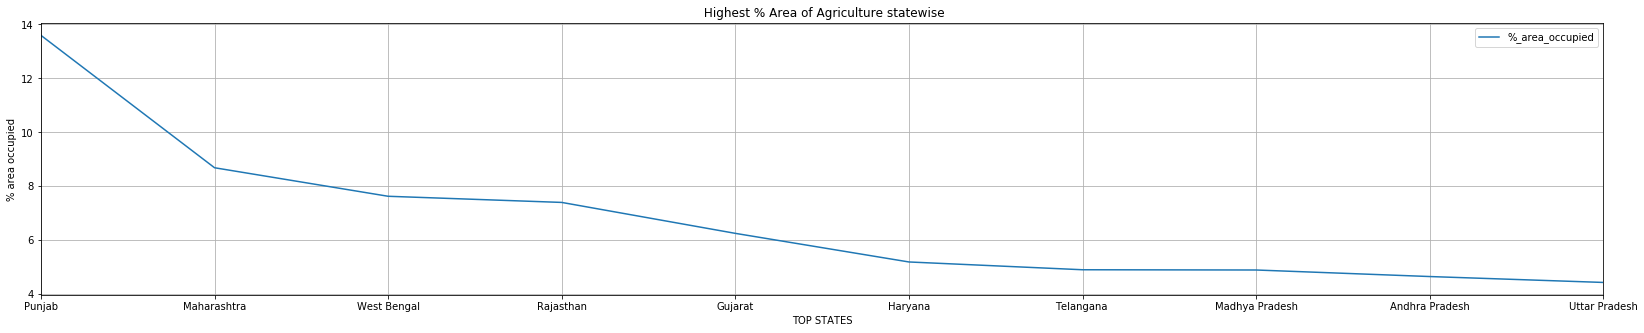

In [ ]:
states[:10].plot(x='State', y='%_area_occupied' ,figsize=(28,5),grid=True)
plt.title(" Highest % Area of Agriculture statewise")
plt.xlabel("TOP STATES")
plt.ylabel("% area occupied")

In [ ]:
states1=df[['State_Name','Production']].copy()

states1=states1.groupby('State_Name')['Production'].mean()
states1=states1.reset_index()
states1.columns=["State","Avg Production"]
states1=states1.sort_values('Avg Production',ascending=False)

In [ ]:
states1

State  Avg Production
15                       Kerala    2.445167e+07
0   Andaman and Nicobar Islands    3.573250e+06
8                           Goa    2.443265e+06
1                Andhra Pradesh    1.812006e+06
27                   Tamil Nadu    9.103304e+05
23                   Puducherry    4.411978e+05
24                       Punjab    1.865686e+05
32                  West Bengal    1.456606e+05
3                         Assam    1.444229e+05
17                  Maharashtra    1.011236e+05
30                Uttar Pradesh    9.745677e+04
10                      Haryana    8.398103e+04
9                       Gujarat    6.267679e+04
28                   Telangana     5.994418e+04
14                    Karnataka    4.096161e+04
31                  Uttarakhand    2.739427e+04
25                    Rajasthan    2.331512e+04
16               Madhya Pradesh    1.985670e+04
4                         Bihar    1.941738e+04
22                       Odisha    1.189767e+04
6                  Chhattisgarh    9.736874e+03
29                      Tripura    8.868921e+03
13                    Jharkhand    8.513224e+03
12           Jammu and Kashmir     8.144005e+03
11             Himachal Pradesh    7.249661e+03
7        Dadra and Nagar Haveli    7.026125e+03
19                    Meghalaya    4.224798e+03
18                      Manipur    4.131846e+03
26                       Sikkim    3.411394e+03
21                     Nagaland    3.269967e+03
2             Arunachal Pradesh    2.681302e+03
20                      Mizoram    1.741656e+03
5                    Chandigarh    7.186124e+02

In [ ]:
total1=states1["Avg Production"].sum()
total1

34726116.93273626

In [ ]:
def per1(i):
  y=(i/total1)*100
  return y

In [ ]:
states1.loc[:,'%_production']=states1['Avg Production'].apply(per1)

In [ ]:
states1

State  Avg Production  %_production
15                       Kerala    2.445167e+07     70.412919
0   Andaman and Nicobar Islands    3.573250e+06     10.289806
8                           Goa    2.443265e+06      7.035813
1                Andhra Pradesh    1.812006e+06      5.217992
27                   Tamil Nadu    9.103304e+05      2.621458
23                   Puducherry    4.411978e+05      1.270507
24                       Punjab    1.865686e+05      0.537257
32                  West Bengal    1.456606e+05      0.419455
3                         Assam    1.444229e+05      0.415891
17                  Maharashtra    1.011236e+05      0.291203
30                Uttar Pradesh    9.745677e+04      0.280644
10                      Haryana    8.398103e+04      0.241838
9                       Gujarat    6.267679e+04      0.180489
28                   Telangana     5.994418e+04      0.172620
14                    Karnataka    4.096161e+04      0.117956
31                  Uttarakhand    2.739427e+04      0.078887
25                    Rajasthan    2.331512e+04      0.067140
16               Madhya Pradesh    1.985670e+04      0.057181
4                         Bihar    1.941738e+04      0.055916
22                       Odisha    1.189767e+04      0.034261
6                  Chhattisgarh    9.736874e+03      0.028039
29                      Tripura    8.868921e+03      0.025540
13                    Jharkhand    8.513224e+03      0.024515
12           Jammu and Kashmir     8.144005e+03      0.023452
11             Himachal Pradesh    7.249661e+03      0.020877
7        Dadra and Nagar Haveli    7.026125e+03      0.020233
19                    Meghalaya    4.224798e+03      0.012166
18                      Manipur    4.131846e+03      0.011898
26                       Sikkim    3.411394e+03      0.009824
21                     Nagaland    3.269967e+03      0.009416
2             Arunachal Pradesh    2.681302e+03      0.007721
20                      Mizoram    1.741656e+03      0.005015
5                    Chandigarh    7.186124e+02      0.002069

Text(0, 0.5, '% Production')

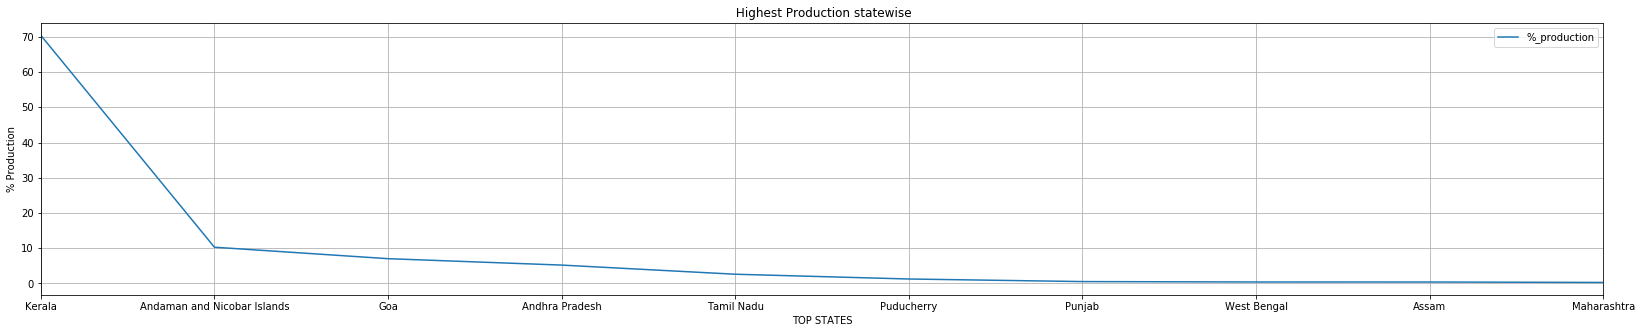

In [ ]:
states1[:10].plot(x='State', y='%_production' ,figsize=(28,5),grid=True)
plt.title(" Highest Production statewise")
plt.xlabel("TOP STATES")
plt.ylabel("% Production")

In [ ]:
states=pd.merge(states,states1,on="State",how="inner")

In [ ]:
states

State      Avg Area  ...  Avg Production  %_production
0                        Punjab  39938.728648  ...    1.865686e+05      0.537257
1                   Maharashtra  25515.223076  ...    1.011236e+05      0.291203
2                   West Bengal  22407.702889  ...    1.456606e+05      0.419455
3                     Rajasthan  21737.646236  ...    2.331512e+04      0.067140
4                       Gujarat  18367.001422  ...    6.267679e+04      0.180489
5                       Haryana  15250.605277  ...    8.398103e+04      0.241838
6                    Telangana   14402.659586  ...    5.994418e+04      0.172620
7                Madhya Pradesh  14375.327377  ...    1.985670e+04      0.057181
8                Andhra Pradesh  13662.842127  ...    1.812006e+06      5.217992
9                 Uttar Pradesh  13019.624992  ...    9.745677e+04      0.280644
10                    Karnataka   9606.577171  ...    4.096161e+04      0.117956
11                       Odisha   8142.439484  ...    1.189767e+04      0.034261
12                 Chhattisgarh   7754.194042  ...    9.736874e+03      0.028039
13                       Kerala   7488.400218  ...    2.445167e+07     70.412919
14                    Jharkhand   7417.888017  ...    8.513224e+03      0.024515
15                   Tamil Nadu   7078.900642  ...    9.103304e+05      2.621458
16                        Bihar   6792.270638  ...    1.941738e+04      0.055916
17                          Goa   5796.540865  ...    2.443265e+06      7.035813
18           Jammu and Kashmir    5669.903917  ...    8.144005e+03      0.023452
19                        Assam   4811.235849  ...    1.444229e+05      0.415891
20             Himachal Pradesh   4011.178027  ...    7.249661e+03      0.020877
21                  Uttarakhand   3838.476103  ...    2.739427e+04      0.078887
22                      Tripura   3287.258499  ...    8.868921e+03      0.025540
23                       Sikkim   2135.124650  ...    3.411394e+03      0.009824
24            Arunachal Pradesh   1714.197172  ...    2.681302e+03      0.007721
25  Andaman and Nicobar Islands   1664.512660  ...    3.573250e+06     10.289806
26                      Manipur   1584.265193  ...    4.131846e+03      0.011898
27                     Nagaland   1554.268817  ...    3.269967e+03      0.009416
28       Dadra and Nagar Haveli   1507.661597  ...    7.026125e+03      0.020233
29                    Meghalaya   1407.404255  ...    4.224798e+03      0.012166
30                      Mizoram   1038.385758  ...    1.741656e+03      0.005015
31                   Puducherry    626.417808  ...    4.411978e+05      1.270507
32                   Chandigarh    139.133333  ...    7.186124e+02      0.002069

[33 rows x 5 columns]

In [ ]:
# import graph objects as "go"
import plotly.graph_objs as go
from plotly.offline import iplot

# Creating trace1
trace1 = go.Scatter(
                    x = states.State,
                    y = states["%_area_occupied"],
                    mode = "lines",
                    name = "Area occupied",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= states.State)
# Creating trace2
trace2 = go.Scatter(
                    x = states.State,
                    y = states["%_production"],
                    mode = "lines+markers",
                    name = "Production",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= states.State)
data = [trace1, trace2]
layout = dict(title = 'Area and Production vs States(left-->right in order of decreasing area)',
              xaxis= dict(title= 'States',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [ ]:
trace1 = go.Bar(
                x = states.State,
                y = states["%_area_occupied"],
                name = "Area",
                marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = states.State)
# create trace2 
trace2 = go.Bar(
                x = states.State,
                y = states["%_production"],
                name = "Production",
                marker = dict(color = 'rgba(0, 128, 0, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = states.State)
data = [trace1, trace2]
layout = go.Layout()
fig = go.Figure(data = data, layout = layout)
iplot(fig)

**OBSERVATION**

*   The states with large area have not neccessarily the highest production
*   The states with large areas of farming are *Punjab* *Maharashtra* and *West Bengal* but have negliguble production
*  The production of **Kerala**	accounts for **70.412919%** which is the highest
even after occcupying less area space
*   followed by *Andaman and Nicobar Islands* with 10.2% and *Goa* 7%
*   The  only state **Andhra Pradesh** has the similar ratio of area to production







In [ ]:
len(df["Crop"].value_counts())

124

In [ ]:
df["Crop"].value_counts().idxmin()

'Other Dry Fruit'

In [ ]:
df["Crop"].value_counts()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Pear                     6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [ ]:
year=df[["Crop_Year","Production"]]
year=year.groupby('Crop_Year')['Production'].mean()
year=year.reset_index()
year=year[-10:]
year["Production"]=(year["Production"]/year["Production"].sum())*100
year.sort_values('Crop_Year',ascending=False)
year

Crop_Year  Production
9        2006   10.204011
10       2007    7.919506
11       2008    8.908058
12       2009    9.140203
13       2010    7.511806
14       2011   17.043116
15       2012   10.180505
16       2013   15.729688
17       2014   13.160046
18       2015    0.203061

Text(0, 0.5, '% Production')

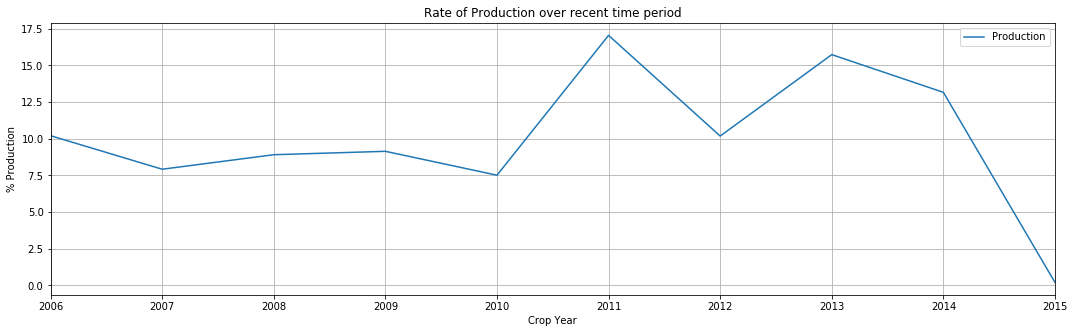

In [ ]:
year.plot(x='Crop_Year', y='Production' ,figsize=(18,5),grid=True)
plt.title("Rate of Production over recent time period")
plt.xlabel("Crop Year")
plt.ylabel("% Production")

Text(0.5, 1.0, 'Crop Production Yearly')

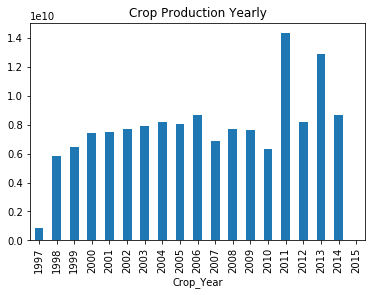

In [ ]:

plt.tick_params(labelsize=10)
df.groupby("Crop_Year")["Production"].agg("sum").plot.bar()
plt.title('Crop Production Yearly')

Production rate was highest in 2011

In [ ]:
crop=df[["Crop","Production"]].copy()
crop=crop.groupby('Crop')['Production'].mean()
crop=crop.reset_index()
crop["Production"]=(crop["Production"]/crop["Production"].sum())*100
crop.sort_values('Production',ascending=False,inplace=True)
crop[:10]

Crop  Production
28          Coconut    96.582232
106        Sugarcane    1.028972
113  Total foodgrain    0.334861
119            Wheat    0.246142
49              Jute    0.187604
95              Rice    0.154871
66    Oilseeds total    0.149817
33      Cotton(lint)    0.098608
109          Tapioca    0.096448
76             Paddy    0.096291

In [ ]:
crop=crop[:5]
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=crop["Crop"], y=crop["Production"])])
fig.update_layout(title_text='Highest grown crops in India')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



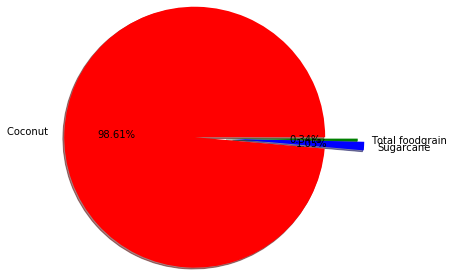

In [ ]:
crop=crop[:3]
plt.figure(figsize=(3,3))
labels=[i for i in crop["Crop"]]
colors=['red','blue','green',]
explode=[0.5,0.1,0]
values=[i for i in crop["Production"]]
plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.2f%%',radius=2.0,shadow=True)
#plt.legend([i for i in crop["Crop"])
#plt.axis('equal')
plt.tight_layout()
plt.show()

Binning

In [ ]:
df.dropna(subset=['Production'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
bins=np.linspace(min(df["Production"]), max(df["Production"]), 6)
bins

array([0.00000e+00, 2.50160e+08, 5.00320e+08, 7.50480e+08, 1.00064e+09,
       1.25080e+09])

In [ ]:
group_names=['Poor','Low','Medium','Good','Very High']

In [ ]:
df['Production_binned']=pd.cut(df['Production'],bins,labels=group_names, include_lowest=True)
df[['Production','Production_binned']].head(20)

Production Production_binned
0       2000.00              Poor
1          1.00              Poor
2        321.00              Poor
3        641.00              Poor
4        165.00              Poor
5   65100000.00              Poor
6        100.00              Poor
7          2.00              Poor
8         15.00              Poor
9        169.00              Poor
10      2061.00              Poor
11         1.00              Poor
12       300.00              Poor
13       192.00              Poor
14  64430000.00              Poor
15       100.00              Poor
16         1.00              Poor
17        33.00              Poor
18       510.84              Poor
19      2083.00              Poor

In [ ]:
df["Production_binned"].value_counts()

Poor         242168
Low              90
Medium           69
Good             28
Very High         6
Name: Production_binned, dtype: int64

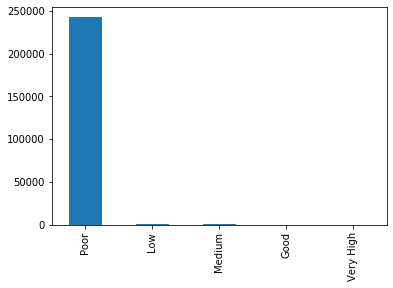

In [ ]:
df["Production_binned"].value_counts().plot.bar()

**There is extremely overall poor production**

In [ ]:
bindata=df.groupby('Production_binned')['Area'].mean()


Text(0, 0.5, 'Area')

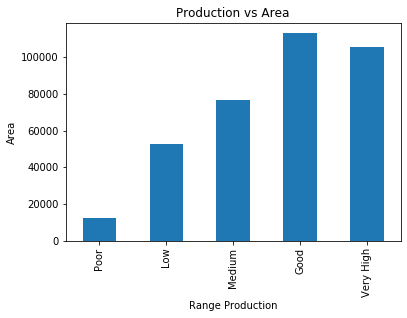

In [ ]:
bindata.plot.bar()
plt.title('Production vs Area')
plt.xlabel('Range Production')
plt.ylabel('Area')

AREA WISE BINNING

In [ ]:
bins1=np.linspace(min(df["Area"]), max(df["Area"]), 4)
bins1

array([4.00000000e-02, 2.86003336e+06, 5.72006668e+06, 8.58010000e+06])

In [ ]:
grp_names=['Large','Medium','Small']

In [ ]:
df['Area_binned']=pd.cut(df['Area'],bins1,labels=grp_names, include_lowest=True)
df[['Area','Area_binned']].head(20)

Area Area_binned
0    1254.0       Large
1       2.0       Large
2     102.0       Large
3     176.0       Large
4     720.0       Large
5   18168.0       Large
6      36.0       Large
7       1.0       Large
8       5.0       Large
9      40.0       Large
10   1254.0       Large
11      2.0       Large
12     83.0       Large
13    719.0       Large
14  18190.0       Large
15     46.0       Large
16      1.0       Large
17     11.0       Large
18    189.2       Large
19   1258.0       Large

In [ ]:
df["Area_binned"].value_counts()

Large     246079
Medium        11
Small          1
Name: Area_binned, dtype: int64

Text(0.5, 1.0, 'Sizes if Area cultivated')

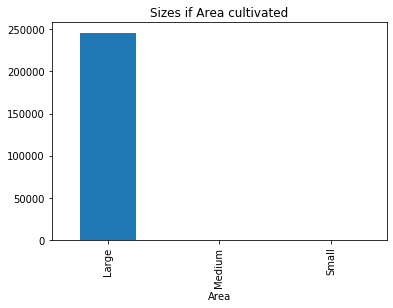

In [ ]:
df["Area_binned"].value_counts().plot.bar()
plt.xlabel('Area')
plt.title('Sizes if Area cultivated')

Large areas are cultivated

In [ ]:
df.groupby('Season')['Production_binned']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
data=pd.read_csv('crop_production.csv')

In [ ]:
# Clusters

In [ ]:
data.head()

State_Name District_Name  ...    Area Production
0  Andaman and Nicobar Islands      NICOBARS  ...  1254.0     2000.0
1  Andaman and Nicobar Islands      NICOBARS  ...     2.0        1.0
2  Andaman and Nicobar Islands      NICOBARS  ...   102.0      321.0
3  Andaman and Nicobar Islands      NICOBARS  ...   176.0      641.0
4  Andaman and Nicobar Islands      NICOBARS  ...   720.0      165.0

[5 rows x 7 columns]

In [ ]:
data.dropna(subset=['Production'],axis=0,inplace=True)

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242361 entries, 0 to 242360
Data columns (total 7 columns):
State_Name       242361 non-null object
District_Name    242361 non-null object
Crop_Year        242361 non-null int64
Season           242361 non-null object
Crop             242361 non-null object
Area             242361 non-null float64
Production       242361 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.9+ MB


In [ ]:

#data=data[["Area","Production"]]
#data["Area"]=data["Area"]/data["Area"].max()
#data["Production"]=data["Production"]/data["Production"].max()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#label=LabelEncoder()
#data['Season']=label.fit_transform(data['Season'])

In [ ]:
X=data.iloc[:,:]

In [ ]:
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(X)

In [ ]:
kmeans.labels_

In [ ]:
ssd=[]
range_n_clusters=[1,2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)
    
#plot the SSDs for each n_clusters
plt.plot(range_n_clusters,ssd,'ro-')
#plt.xticks([1,2,3,4,5,6,7,8])
#ssd

In [ ]:
kmeans=KMeans(n_clusters=2,max_iter=50)
kmeans.fit(X)
si_avg=silhouette_score(X,kmeans.labels_)
print(si_avg)

KeyboardInterrupt: ignored

In [ ]:
data = data[data['Season'] != 'Whole Year ']

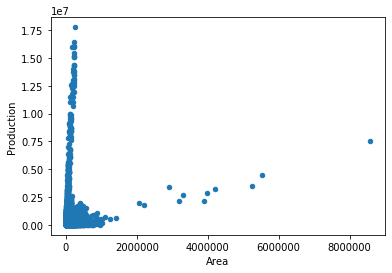

In [ ]:
data.plot.scatter(x="Area",y="Production")

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label1=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
label4=LabelEncoder()

In [ ]:

data['State_Name']=label1.fit_transform(data['State_Name'])
data['Season']=label2.fit_transform(data['Season'])
data['Crop']=label3.fit_transform(data['Crop'])
data['District_Name']=label4.fit_transform(data['District_Name'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
for i in data.columns:
  data[i]=data[i]/data[i].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


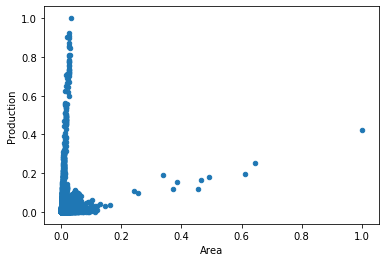

In [ ]:
data.plot.scatter(x="Area",y="Production")

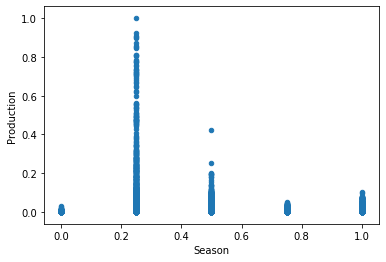

In [ ]:
data.plot.scatter(x="Season",y="Production")

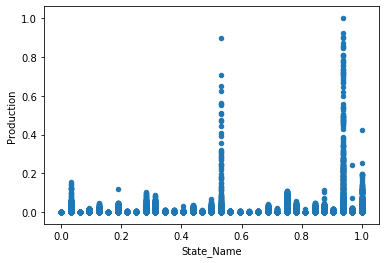

In [ ]:
data.plot.scatter(x="State_Name",y="Production")

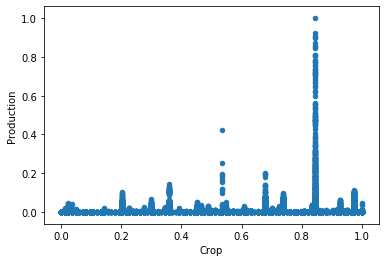

In [ ]:
data.plot.scatter(x="Crop",y="Production")

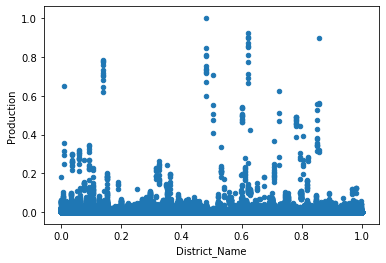

In [ ]:
data.plot.scatter(x="District_Name",y="Production")

In [ ]:
range_n_clusters=[2,3]

for num_clusters in range_n_clusters:
    #initialise kmeans
    kmeans=KMeans(n_clusters=num_clusters,max_iter=10)
    kmeans.fit(X)
    
    cluster_labels=kmeans.labels_
    
    #sillhoute score
    silhoutte_avg=silhouette_score(X, cluster_labels)
    print("For n_clusters={0},the silhoutte score is {1}".format(num_clusters,silhoutte_avg))

KeyboardInterrupt: ignored

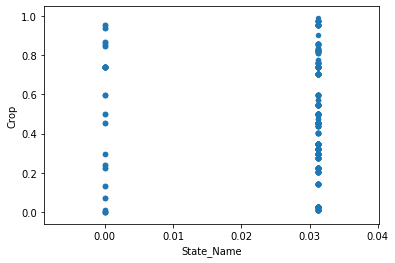

In [ ]:
data[:500].plot.scatter(x="State_Name",y="Crop")

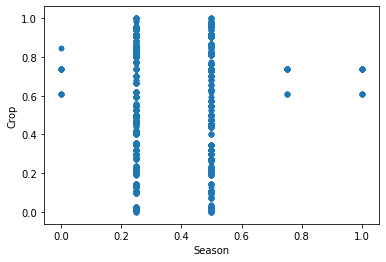

In [ ]:
data[:10000].plot.scatter(x="Season",y="Crop")

In [ ]:
import plotly.express as px


In [ ]:

px.scatter_3d?
color=[]

In [ ]:
px.scatter_3d(data_frame=data,x='Season',y='Crop',z='Production')

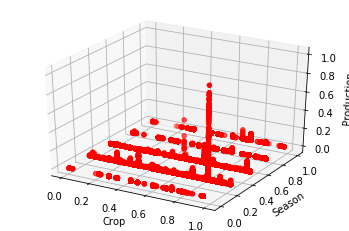

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =data["Crop"]
y =data["Season"]
z =data["Production"]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Crop')
ax.set_ylabel('Season')
ax.set_zlabel('Production')

plt.show()

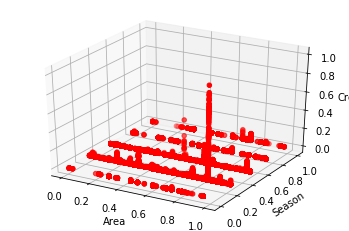

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =data["Crop"]
y =data["Season"]
z =data["Production"]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Area')
ax.set_ylabel('Season')
ax.set_zlabel('Crop')

plt.show()

In [ ]:
#Hence clustering is not apt for this dataset